# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=imperial&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | darwin
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | mount pearl
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | sao felix do xingu
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | la'ie
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | cerro de ortega
Processing Record 11 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | castillos
Processing Record 14 of Set 1 | villaviciosa
Processing Record 15 of Set 1 | fort mcmurray
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | klyuchi
Processing Record 19 of Set 1 | kongolo
Processing Record 20 of Set 1 | atafu village
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,darwin,-12.4611,130.8418,82.38,85,60,8.05,AU,1707243302
1,hermanus,-34.4187,19.2345,74.80,73,33,19.91,ZA,1707243438
2,mount pearl,47.5166,-52.7813,33.46,97,100,26.46,CA,1707243438
3,edinburgh of the seven seas,-37.0676,-12.3116,62.40,69,8,6.13,SH,1707243438
4,sao felix do xingu,-6.6447,-51.9950,88.81,59,100,7.23,BR,1707243321


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,darwin,-12.4611,130.8418,82.38,85,60,8.05,AU,1707243302
1,hermanus,-34.4187,19.2345,74.80,73,33,19.91,ZA,1707243438
2,mount pearl,47.5166,-52.7813,33.46,97,100,26.46,CA,1707243438
3,edinburgh of the seven seas,-37.0676,-12.3116,62.40,69,8,6.13,SH,1707243438
4,sao felix do xingu,-6.6447,-51.9950,88.81,59,100,7.23,BR,1707243321


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

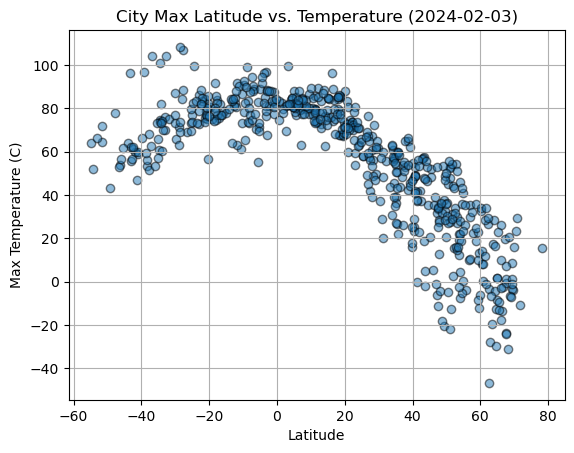

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.5, )

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-02-03)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

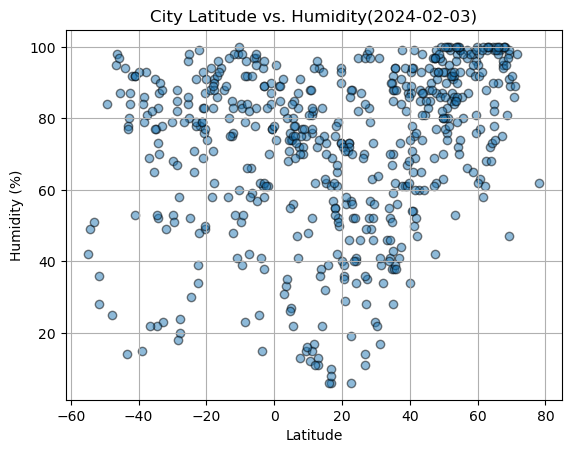

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.5, )

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(2024-02-03)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

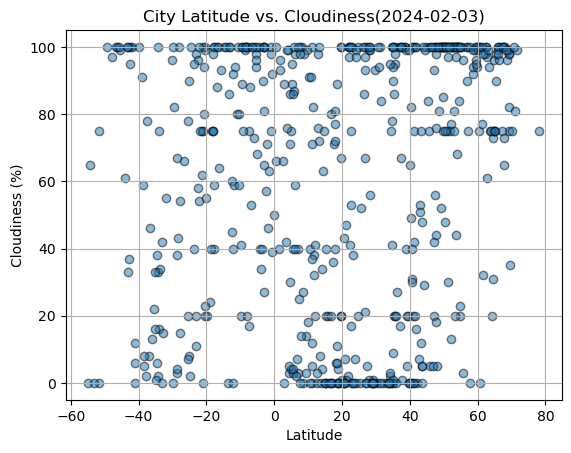

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.5, )

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(2024-02-03)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

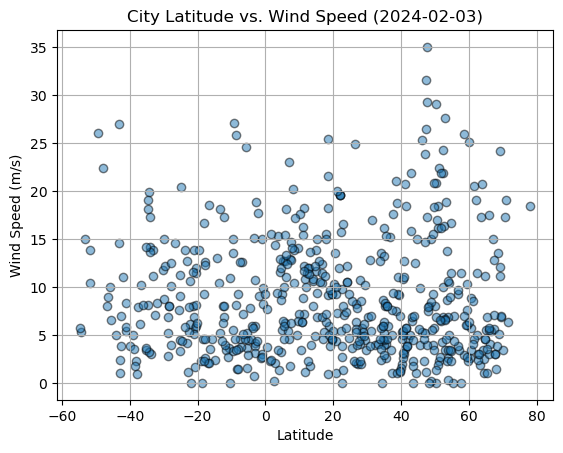

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.5, )

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-02-03)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regressionplot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, r"r--")
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.title(y_values.name + " by " + x_values.name)
    plt.annotate(line_eq,(min(x_values), min(y_values)), fontsize = 12, color="red")

    return print(f"The r-value is : {rvalue**2}"), plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mount pearl,47.5166,-52.7813,33.46,97,100,26.46,CA,1707243438
5,la'ie,21.6477,-157.9253,74.61,71,2,11.99,US,1707243439
8,cerro de ortega,18.7500,-103.7667,85.12,52,0,5.95,MX,1707243439
11,villaviciosa,43.4813,-5.4357,57.61,74,5,2.30,ES,1707243440
12,fort mcmurray,56.7268,-111.3810,9.99,66,100,9.22,CA,1707243440


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,darwin,-12.4611,130.8418,82.38,85,60,8.05,AU,1707243302
1,hermanus,-34.4187,19.2345,74.80,73,33,19.91,ZA,1707243438
3,edinburgh of the seven seas,-37.0676,-12.3116,62.40,69,8,6.13,SH,1707243438
4,sao felix do xingu,-6.6447,-51.9950,88.81,59,100,7.23,BR,1707243321
6,blackmans bay,-43.0167,147.3167,55.53,78,33,1.01,AU,1707243439


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.7697697036389726


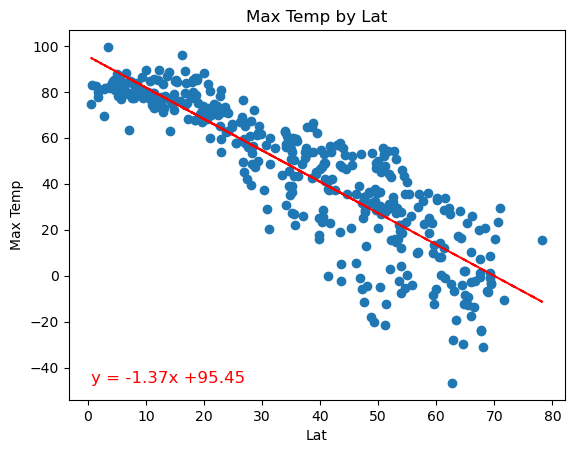

(None, None)

In [15]:
# Linear regression on Northern Hemisphere
regressionplot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

The r-value is : 0.2582542134619729


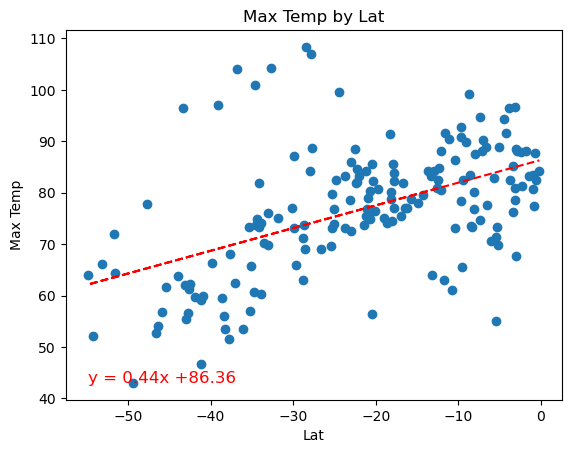

(None, None)

In [16]:
# Linear regression on Southern Hemisphere
regressionplot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])


**Discussion about the linear relationship:**

There is a strong negative correlation when looking at the relationaship of Latitude and Max Temperature in the Northern Hemisphere.  This is showing as you move further and further away from the equater (Latitude 0) the max tempature of your location becomes lower.  There is a weak correlation when we are talking about the Souther Hemisphere.  This shows as you get closer to the equator the max tempature is higher.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.22244307751526768


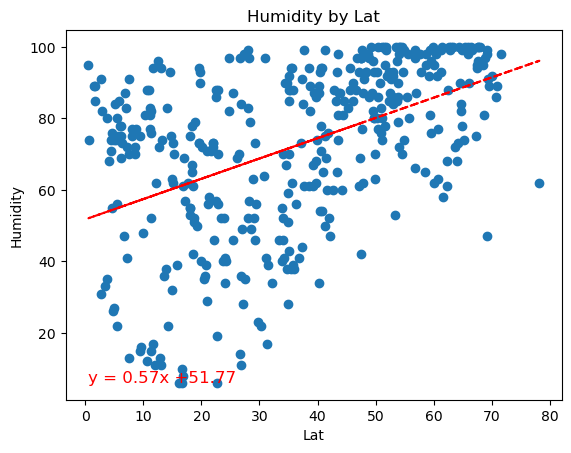

(None, None)

In [17]:
# Northern Hemisphere
regressionplot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

The r-value is : 0.012855589806164757


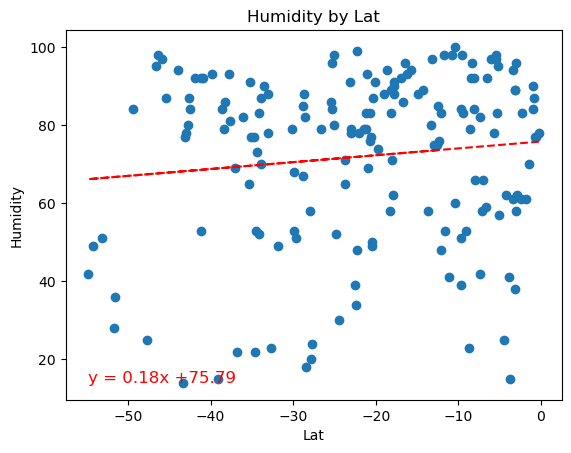

(None, None)

In [18]:
# Southern Hemisphere
regressionplot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** Based on the r-value for both northern and southern hemispheres comparing the relationship between max tempature and humididty, there really isn't any correlation.  Since the r-value is less or equal to .3, we do not find a correlation.    

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.1363589935445151


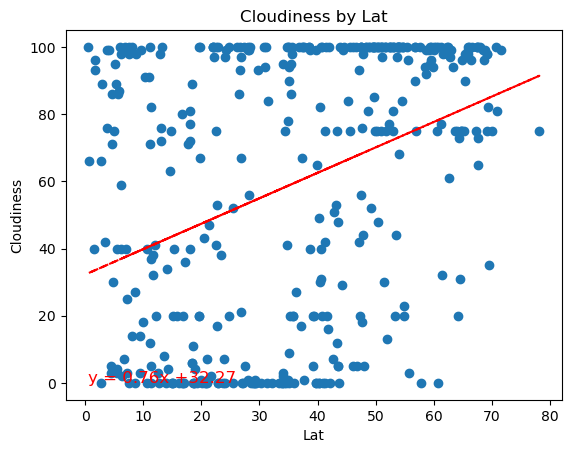

(None, None)

In [19]:
# Northern Hemisphere
regressionplot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

The r-value is : 0.08045682030139914


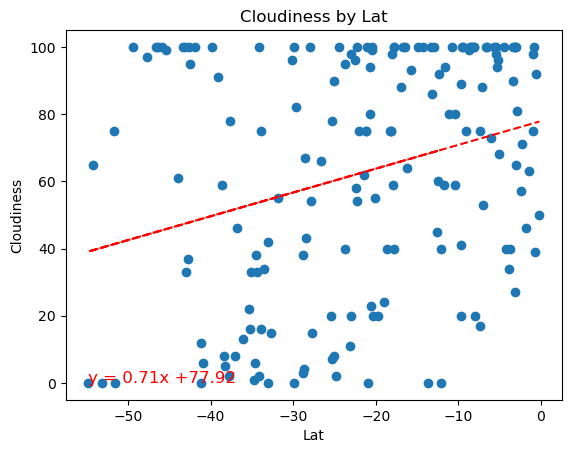

(None, None)

In [20]:
# Southern Hemisphere
regressionplot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** Based on the r-value for both northern and southern hemispheres comparing the relationship between max tempature and cloudiness, there really isn't any correlation.  Since the r-value is less or equal to .3, we do not find a correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.0009999904963210484


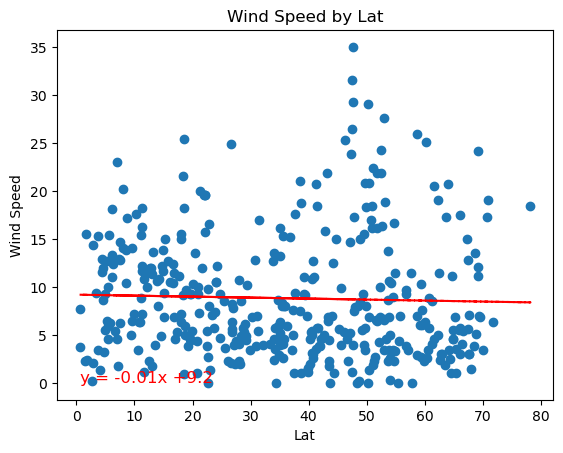

(None, None)

In [21]:
# Northern Hemisphere
regressionplot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

The r-value is : 0.017360754112309414


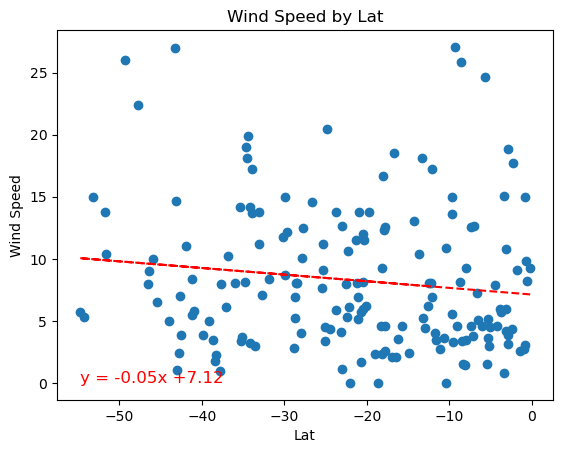

(None, None)

In [22]:
# Southern Hemisphere
regressionplot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** Based on the r-value for both northern and southern hemispheres comparing the relationship between max tempature and wind speed, there really isn't any correlation.  Since the r-value is less or equal to .3, we do not find a correlation.